# **Cyclistic Porfolio Project using SQL and Tableau** 

This case study is a part of the Google Data Analytics Professional Certification. In this project I will analyse historical data from a Chicago based bike-share company in order to identify trends in how their customers use bikes differently. The main tools I use are SQL and Tableau. Please visit my [**GitHub**](https://github.com/MykhailoYampolskyi/Cyclistic-Portfolio-Project) for SQL queries and [**Tableau**](https://public.tableau.com/app/profile/mykhailo.yampolskyi/viz/CyclisticCaseStudy_16780382364450/Dashboard1?publish=yes) to view the dashboard.

# **Scenario**

There are two types of customers. Customers who purchase single-ride or full-day passes are known as **casual** riders, while those who purchase annual memberships are known as **members**. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. 
The marketing analytics team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, they will design a new marketing strategy to convert casual riders into annual members.
Primary stakeholders are: Lily Moreno (The director of marketing) and Cyclistic executive team.
Secondary stakeholders are Cyclistic marketing analytics team.

# **Business Task**

> # Analyze historical bike trip data to identify trends in how annual members and casual riders use Cyclistic bikes differently.

# **Description of data sources**
I’ll be using Cyclistic’s historical bike trip data from the last 12 months, which is publicly available [**here**](http://divvy-tripdata.s3.amazonaws.com/index.html). The data has been made available by Motivate International Inc. under this [**license**](https://ride.divvybikes.com/data-license-agreement). The data is structured and stored in spreadsheets. The data needs to be cleaned before further analysis.

**ROCCC analysis of data:**

- Reliable and original: this is a publicly available data that contains accurate, complete and unbiased info on Cyclistic’s historical bike trips. It can be used for analysis to get a broad sense of certain patterns that are occurring in the two different customer groups. Understanding the differences will provide more accurate customer profiles for each group.

- Comprehensive and current: these sources contain all the data needed to understand the different ways members and casual riders use Cyclistic bikes. The data is relevant and up to date, from the past 12 months. 

- Cited: these sources are publicly available data provided by Cyclistic and the City of Chicago. Governmental agency data and vetted public data are typically good and reliable sources of data.

The data is presented in the following way:

- ride id               #The unique record that identifies each ride
- rideable_type         #Bike type - Classic, Docked, Electric
- started_at            #Trip start day and time
- ended_at              #Trip end day and time
- start_station_name    #Trip start station
- start_station_id      #Trip start station id
- end_station_name      #Trip end station
- end_station_id        #Trip end station id
- start_lat             #Trip start latitude  
- start_lng             #Trip start longitute   
- end_lat               #Trip end latitude  
- end_lat               #Trip end longitute   
- member_casual         #Rider type - Member or Casual 



# **Data manipulation and cleaning**

Since I am operating with large sets of data, I decided to use SQL for data cleaning. I have created a bucket on Google Cloud, created a dataset in Google BigQuery and uploaded the 12 tables for the full year of 2022 into the dataset. I then [**merged**](https://github.com/MykhailoYampolskyi/Cyclistic-/blob/main/Merging%20tables) the tables using "UNION ALL".






When looking at data, I noticed few things:
*      There are null values in *start* and *end station_names* and *ids*
*      Longitude and latitude values are inconsistent 
*      From the initial inspection I noticed that *start* and *end station_names*/*ids* contain words/characters like (Temp) or '*' that need to be cleaned. 

I also suspect that there may be duplicates so I decided to perform a [**query**](https://github.com/MykhailoYampolskyi/Cyclistic-/blob/main/Checking%20unique%20station%20names%20by%20abg%20lat%20and%20lng) to identify bike stations that have multiple names or aliases based on their AVG lat and lng.

I then created a new table adding a column with the length of each ride in minutes, the month the ride took place in and a column for the day of the week the ride took place (1 = Sunday, 7 = Saturday). I also cleaned NULLs from *start_station_name, start_station_id, end_station_name, and end_station_id*. As NULL values were only present in those columns, I was hesitant as to removing them, but nonetheless decided to proceed.
After removing NULL values the total number of records decreased by 22%. 
Going forward, I performed the same analysis for the table with NULL values present, and it didn't affect the conclusions.

The final query to clean data looked like [**this**](https://github.com/MykhailoYampolskyi/Cyclistic-/blob/main/Data%20Cleaning%20Final%20Query).

I also decided to [**change**](https://github.com/MykhailoYampolskyi/Cyclistic-/blob/main/CAST%20for%20days%20of%20the%20week) the data type of started_day to STRING by overwriting the existing table and using CAST and changed numbers to their corresponding day names for better accessibility. 

#  **Analysis**

Let's analyse historical bike trip data to identify differences and trends in how annual members and casual riders use Cyclistic services and gain an insight into how casual riders could be converted into annual members. 
1) When looking at the [**total**](https://github.com/MykhailoYampolskyi/Cyclistic-/blob/main/TotalTrips%20by%20customers) number of trips for both members and casual rides, it is evident that members made more trips that casual riders.  

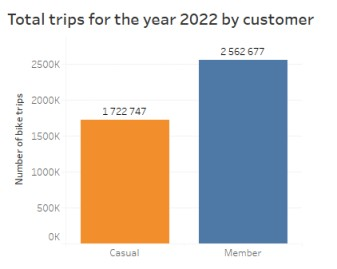

2) When calculating mean and max value for ride length, I noticed that the numbers were unusually high for casual riders, which was 572 hours. This means there are outliers in the data that will affect the mean. I decided not to delete outliers and use [**median**](https://github.com/MykhailoYampolskyi/Cyclistic-/blob/main/Median%20total) value instead as it is a better measure of the mean when outliers are present. (The ride length values are calculated in minutes).

Casual riders seem to ride longer than members. 

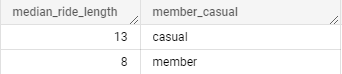

3) I also counted the number of rides for casual and member riders by [**month**](https://github.com/MykhailoYampolskyi/Cyclistic-/blob/main/Rides%20by%20month%20by%20customers) for the year 2022. The peak rides are during summer for both casual and member riders, although there is a sharp increase only for casual riders and more stable trend for members.



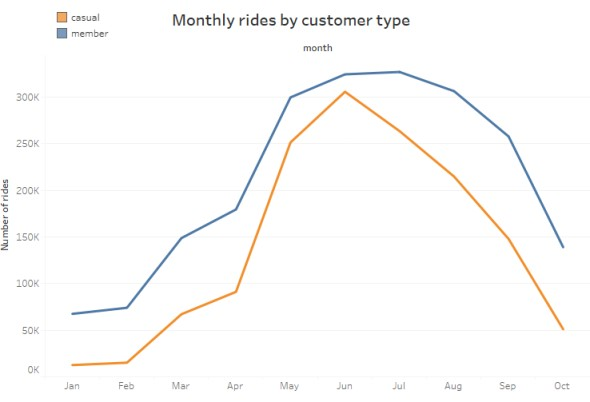

4) Next, I decided to look at how casual and member riders use bikes on [**daily**](https://github.com/MykhailoYampolskyi/Cyclistic-/blob/main/Rides%20by%20day) basis. Although both customers ride almost equally on weekends, there is a U-shaped pattern for casual riders. There are much more member rides during the week, whereas casual riders begin using bikes by the end of the week, peaking on weekends. **My initial hypothesis is that member riders use Cyclistic services to commute to/from work, whereas casual riders mostly use bikes for leisure.**



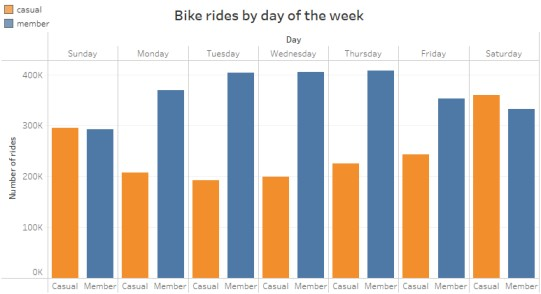

5) Next, I wanted to look at the [**median**](https://github.com/MykhailoYampolskyi/Cyclistic-/blob/main/Median%20length%20by%20day) ride length by day. Members tend to drive the same average distances during the weekdays (perhaps commuting to/from work), whereas casual riders drive longer by the end of the week and on weekends, which supports the initial hypothesis.


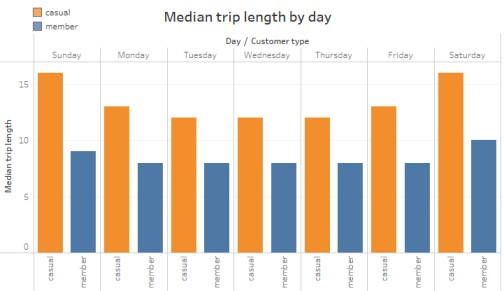

6) It is therefore worth looking at the number of [**rides by hour**](https://github.com/MykhailoYampolskyi/Cyclistic-/blob/main/Rides%20by%20hour%20by%20day) for weekends and weekdays for both customers, to further consolidate the hypothesis.



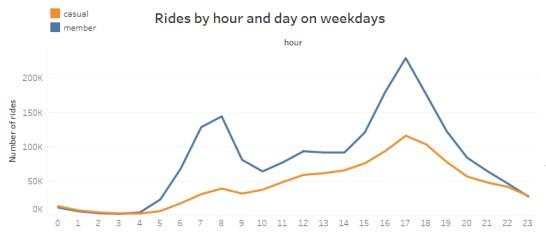



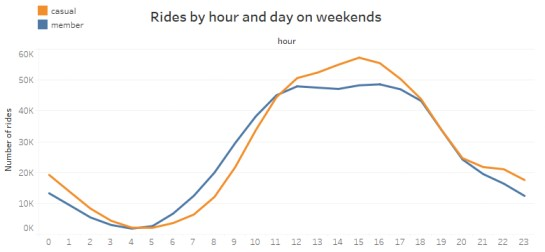






When looking at the weekdays graph, members tend to ride more in the morning (07:00/08:00) and in the evening (17:00), same is for casual riders at a smaller scale; there is a more gradual upward trend. There is also a small increase for member rides during the day at 12:00, which could indicates the approximate lunch time for members who commute to work. This further consolidates the hypothesis. 

When looking at the weekends graph, both types of customers ride more during 12:00 and 18:00.  

7) I also looked at what [**bike types**](https://github.com/MykhailoYampolskyi/Cyclistic-/blob/main/bike%20types) are preferred by members and casual riders. This did not provide meaningful insights. Both types of customers prefer classic bikes, and do not like docked bikes apparently. There was no data for docked bikes for members. 

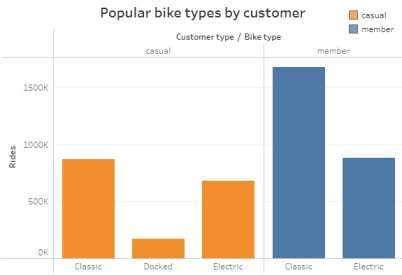

Finally, let's look at the [**most popular stations**](https://github.com/MykhailoYampolskyi/Cyclistic-/blob/main/popular%20stations) by customer type and number of rides in Chicago. Please visit my [**Tableau**](https://public.tableau.com/app/profile/mykhailo.yampolskyi/viz/CyclisticCaseStudy_16780382364450/Dashboard1?publish=yes) dashboard for a comprehensive view.

Location data zoomed out:

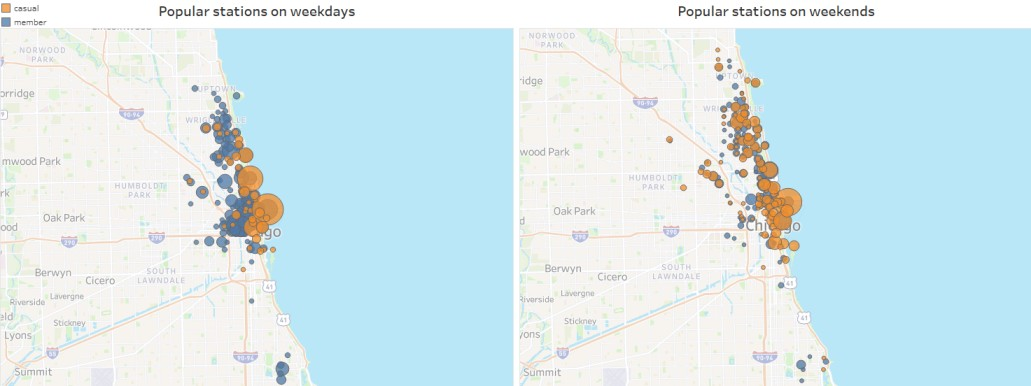

Location data shows that casual riders favor places by the coastline and around the city centre, mainly popular tourist attractions like Buckingham Fountain, Navy Pier or Field Museum of Natural History. Their bike usage during the weekdays is less heavy than during the weekends. 

Members also tend to visit tourist attractions during both weekdays and weekends, however their ride usage decreases during the weekends. The most dense areas for members during the weekdays are mainly in the city centre. Members also ride a lot to the University of Chicago. In conclusion, members' bike usage is heavier than that of casual riders during the weekdays, which indicates that members use bikes to commute to/from work/study. Whereas casual rider's bike usage increases during the weekends, around the popular tourist attractions, which indicates that casual riders use bikes for leisure activities, rather than commuting. These observations prove the initial hypothesis.




Location data zoomed in:

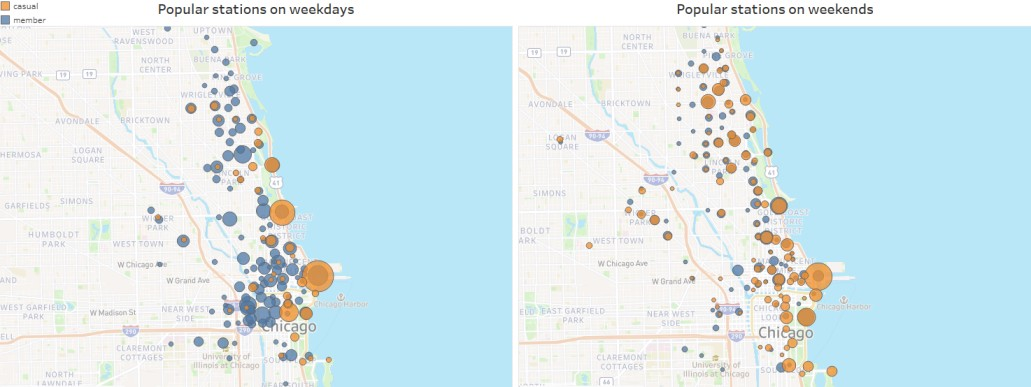

# Recommendations

The above analysis and insights may be used to identify trends in how annual members and casual riders use Cyclistic bikes differently and also provide recommendations as to how casual riders may be converted to annual riders. 


1. **Use cases**

- Members use bike sharing services to commute to/from work, most actively during the weekdays. 
- Casual riders use bike sharing services mainly for leisure activities. They ride much more on weekends.

**It is worth making new types of memberships/packages that are tailored to enternainment and weekend spots. For example, discounts at local tourist attractions, or discounts on weekends on specific routes.**

2. **Seasonal trends**

-Casual riders tend to begin riding more starting May, the peak is on May - August months.

**Launch a promotional campaign to target more causal riders, starting early spring that will run throughout the summer. The campaign shall focus on giving discounts for annual memberships for the next season starting September, along with early bird bonuses, and other discounts.**

3. **Ride duration**

-Member ride duration is consistent throughout the weekdays. In contrast to members, casual customers' ride duration is much higher during the entire week. Members' bike usage also increases during busiest hours (8:00, 12:00, 17:00).

**Discounts could be offered for members at local cafes/restaurants on weekdays upon showing Cyclistic membership. 
There could also be bonuses offered for longer rides. For example, upon completing a specific mileage, a rider would be given a discount for coffee at the local coffeeshop.**